# Theory



## Assumption on Dataset Generation

A guassian mixture model assumes the conceptual model for the generate of the dataset.

1. Select `j` number of guassian distributions or clusters.
2. For each instance in `X` select a random guassian distribution.
    1. The selection is of the cluster is determined by the probability weight. And the final index for the cluster is denoded $z^{(i)}$ for the ith cluster.

For example, if $z^{(2)}=2$ this means that the 3rd instance in the data is generated from cluster 2 which is guassian distribution with parameters $\mu \text{ (mean)}, \sigma \text{ (covariance matrix)}$


![guassian model](../../../assets/2-unsupervised-learning/guassian_model.png)


**The Reverse**

In reality, we begin with `X`, and what we want to do is start estimating the weights associated with each instance, and all the distribution parameters ($\mu$ and $\sigma$) for each cluster (guassian distribution). 

To find these parameters, we use EM, or Expectation Maximization Algorithm. This is an iterative algorithm for negative log-liklihood maximization. This algorithm identifies the most suitable parameters for the set of Gaussian mixture models.

### The Expectation Maximization Algorithm

The EM algorithm holds many similiaries over the KMeans algorithm. Recall the KMeans algorithm:

1. Initialize k random centroids in space.
2. Assign each observation to its nearest centroids.
3. Recalculate each centroid as the mean of the previously assigned cluster coordinates.
4. Repeat (2-3), until cluster assignments become stable (that is, do not change from previous assignments).

The EM algorithm:

1. Initialize k random points in space.
2. Expectation step: assign instances to one of points of the k points in a probabilistic way. That is, estimate the probabilities of a instance belonging to each of the k clusters. These probabilities are are _responsibilities_ and they will be used in step 3.
3. Maximization step: Update the k cluster points. That is, using all the instances in the dataset (and their associated weights), update each cluster based on these. Instances that have a higher probability or favor towards a particular cluster will impact that specific cluster the most in terms of this update step.
4. Repeat (2-3), until cluster assignements become stable, just like in KMeans.

EM can be thought as a generalization of the KMeans algorithm in that in addition to finding the cluster centroids (means), it additionally finds the their size, shape and orientation.


## Pros and Cons

### Pros
* Can be used for _model estimation_: Given data, you can estimate, approximately what the parameters of this distributions are. Now that you have an approximation of this distribution, you can things such as _model sampling_. That is, we can generate more points using the estimated set of distributions. This can also be used hand in hand with data imputation - where additional data is sample to produce more training data.
* Gaussian distributions are shape agnostic (it can be fit to be circular, diagonal, stretched, etc)

### Cons
* Does not scale well with a large number of features. $O(kmn^2+kn^3)$
* Due to its random nature, the algorithm ususally has to initialized or run several times in order to find good performance.
* Singularities: with small amounts of data, the covariances are estimated poorly.
    * Additionally coverages poorly with many clusters or in a high dimensional setting.
* Number of components are required to be known in initialization.

## Demonstration and Explainations

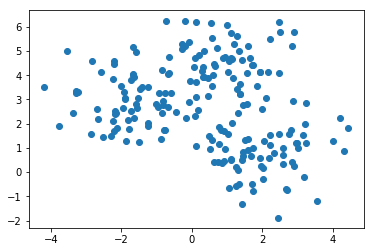

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets.samples_generator import make_blobs
from sklearn.mixture import GaussianMixture

X, y = make_blobs(n_samples=200, centers=3, n_features=2, random_state=0)
plt.scatter(X[:,0], X[:, 1])

In [2]:
# n_init = number of initializations that are performed, and the best one is kept
gm = GaussianMixture(n_components=3, n_init=10)
gm.fit(X)

# seperate X and y to compare to the true estimations
X_0, X_1, X_2 = X[y==0], X[y==1], X[y==2]

In [3]:
print('Estimated Guassian Parameters:')
print(f'weights:\n {gm.weights_}', end='\n\n')
print(f'means:\n {gm.means_}', end='\n\n')
print(f'covariances:\n {gm.covariances_}', end='\n\n')

Estimated Guassian Parameters:
weights:
 [0.31639943 0.33637295 0.34722762]

means:
 [[ 0.92173144  4.55033435]
 [-1.68242734  2.89909118]
 [ 1.96672754  0.84976746]]

covariances:
 [[[ 0.88679289 -0.0232662 ]
  [-0.0232662   0.89587275]]

 [[ 0.99969795 -0.08349552]
  [-0.08349552  0.96274406]]

 [[ 1.04320083  0.05080197]
  [ 0.05080197  1.04056045]]]



In [4]:
import numpy as np


print('Actual Guassian Parameters')
print('means')
print(f'[[{np.mean(X_0[:, 0])} {np.mean(X_0[:, 1])}]')
print(f' [{np.mean(X_1[:, 0])} {np.mean(X_1[:, 1])}]]')
print(f' [{np.mean(X_2[:, 0])} {np.mean(X_2[:, 1])}]]')

print()
print('covariances')
# note: .T because it cov operates on horizontal vectors
print(np.cov(X_0.T))
print(np.cov(X_1.T))
print(np.cov(X_2.T))


Actual Guassian Parameters
means
[[0.9551988277566075 4.489474359775159]
 [1.9638477199745117 0.7651087393108689]]
 [-1.7250491432307105 2.877807368687578]]

covariances
[[ 0.98052671 -0.10450309]
 [-0.10450309  0.97429942]]
[[1.01514135 0.04632573]
 [0.04632573 0.90224034]]
[[ 0.9380414  -0.1034993 ]
 [-0.1034993   0.91471663]]


**What Do these Estimations Mean?**

* **Weights**: Because there were 2 components estimated, we have the probability weights associated with each distribution.
* **Means**: We can see that this returns a 2x2 matrix. This is because our algorithm was initalized with 2 clusters, and we have to estimate the X and y axis.
* **Covariances**: Covariance measures the joint variability between 2 random variables. In our case, our two random variables are the X and y axises, independently for the 2 clusters.
    $
    \Sigma=\left[ \begin{array}{ll}{\sigma(x, x)} & {\sigma(x, y)} \\ {\sigma(y, x)} & {\sigma(y, y)}\end{array}\right]
    $ 


**Making Predictions**

Both soft and hard predictions are supported.

Text(0.5, 1.0, 'GaussianMixture(n_components=2, n_init=10) Prediction Model')

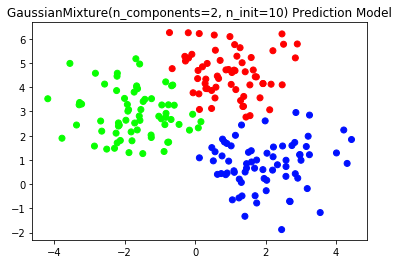

In [5]:
from mltoolbox.draw.color import map_labels_to_random_color

predictions = gm.predict(X)
plt.scatter(X[:, 0], X[:, 1], color=map_labels_to_random_color(predictions))
plt.title('GaussianMixture(n_components=2, n_init=10) Prediction Model')

We observe that the predictions didn't perform as well. Lets try to visualize this in space more concretely. For any sort of hard classification, we should be able to observe a boundary decision.

**Hard Decision Boundary**

Text(0.5, 1.0, 'Gaussian Mixture Model Hard Classification')

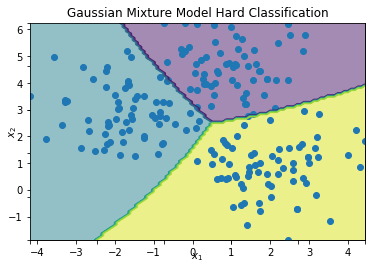

In [6]:
from mltoolbox.draw.classification import plot_2d_decision_boundary_unsupervised

plot_2d_decision_boundary_unsupervised([gm], X, (min(X[:,0]), max(X[:,0])), (min(X[:,1]), max(X[:,1])), 100, 100)
plt.title('Gaussian Mixture Model Hard Classification')

**Soft Classification**

We also able to estimate the density or PDF at any location. Density is not probability, but density can be converted to probability, in this case by $e^d$. The way to look at this is, for every instance we estimate "likelyhood" that a particular instance falls within any of the regions.

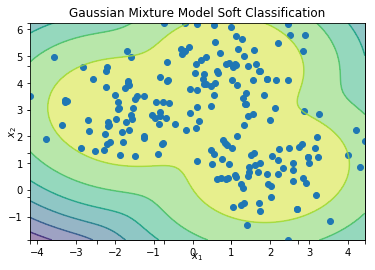

In [7]:
plot_2d_decision_boundary_unsupervised([gm], X, (min(X[:,0]), max(X[:,0])), (min(X[:,1]), max(X[:,1])), 100, 100, soft=True)
plt.title('Gaussian Mixture Model Soft Classification')
plt.show()

## Shape Constrains

By constraining the shape of the model, the "difficulty" of the algorithm can be reduced. Shapes can be constrained by alterning the `covariance_type`:
* spherical: any size sphere.
* diag: elliptical in shape, where the axis are parallel to the coordinate axes.
* tied: all clusters have the same elliptical shape, size and orientation (same covariance matrix).
* full: default option: the cluster can be any size, shape or orientation.

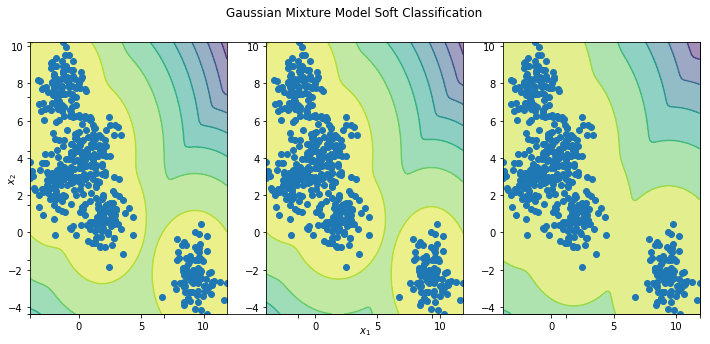

In [8]:
X, y = make_blobs(n_samples=500, centers=5, n_features=2, random_state=0)
gm_s = GaussianMixture(n_components=5, n_init=10, covariance_type='spherical')
gm_d = GaussianMixture(n_components=5, n_init=10, covariance_type='diag')
gm_t = GaussianMixture(n_components=5, n_init=10, covariance_type='tied')

gm_s.fit(X)
gm_d.fit(X)
gm_t.fit(X)


plot_2d_decision_boundary_unsupervised([gm_s, gm_d, gm_t],
                                       X, (min(X[:,0]),max(X[:,0])),
                                       (min(X[:,1]), max(X[:,1])), 100, 100,
                                       soft=True, figsize=(12, 5),
                                       suptitle='Gaussian Mixture Model Soft Classification')

## Automatically Identifying the Optimal Number of Clusters

With kmeans we introduced inertia or the silhouette score to identify the optimal number clusters. This approached worked because the algorithm always produces circular clusters. Because Guassian mixtures do not have this constrain, the same memtric cannot be used.

Instead, we try to minimize the _Baysian information criterion (BIC)_ or the _Akaike information criterion (AIC)_

$$
\begin{aligned} B I C=& \log (m) p-2 \log (\widehat{L}) \\ A I C=& 2 p-2 \log (\widehat{L}) \end{aligned}
$$

Lets break this down these numbers and try to understand what they mean.

In [9]:
import math
from mltoolbox.draw.math import plotly_3d_functions
from plotly.offline import iplot


m = 100
bic = lambda p, L : np.log(m)*p-2*np.log(L)
aic = lambda p, L : 2*p-2*np.log(L)

fig1 = plotly_3d_functions(bic, np.arange(1, 3, 1), np.arange(.001, 1, .01), 
                           title='BIC - L:Likelyhood, p:number parameters',
                           xaxis_title='p', yaxis_title='L', zaxis_title='BIC')
iplot(fig1)

In [10]:
fig2 = plotly_3d_functions(bic, np.arange(1, 3, 1), np.arange(.001, 1, .01), 
                           title='AIC - L:Likelyhood, p:number parameters',
                           xaxis_title='p', yaxis_title='L', zaxis_title='AIC')
iplot(fig2)

### Shape Analysis
* `p` is the number of parameters in the model
    * discrete integer > 0
* `m` is the number of instances
    * discrete integer > 0
* `L` is the likelihood function of the model
    * real number [0, 1]
* Now looking at its shape, this graph looks like a logarithmic like of plane. Both shapes look similiar to one another.
    * As `L` increases, then `IC` decreases
    * As `p` increases, then `IC` increases
    * `IC` increases linearly with `p`
    * `IC` exponentially increases with decrease of `L`
    * `IC` is largest when `p` is high and `L` is low
    
### Putting this into Context

Both IC scores penalize models that have a large number of parameters and a low likelihood score. In other words, the more clusters the algorithm is presented, the more it adds it as a penality to the total `IC` score. This is because we want to favor models that use the fewest amount of clusters to fit the data as possible. Now looking at the liklihood (overall fit), the `IC` even more _heavily_ disfavors models that do not fit well. The way the likelihood is computed is that first the parameters of the guassian mixture are estimated as an MLE, and this are used as the input to the guassian mixture model, to output the liklihood. In other words, this is the value that determines the overall fit to the model, given the best estimation of parameters it could find.


In [11]:
print('bic:', gm.bic(X))
print('aic:', gm.aic(X))

bic: 11770.58408886226
aic: 11698.935751189083


Now its just a matter of finding the minimum aic or bic score.

In [24]:
def find_opt_clusters_gm(X, y, k_start=1, k_end=float('inf'), aic_and_bic=False, verbose=True, **kwargs_model):
    prev_aic_scores, prev_bic_scores = [float('inf'), float('inf')], [float('inf'), float('inf')]
    def stop(ic_score, ic_type):
        if ic_type == 'bic':
            return  prev_bic_scores[-2] <= prev_bic_scores[-1] <= ic_score
        elif ic_type == 'aic':
            return  prev_aic_scores[-2] <= prev_aic_scores[-1] <= ic_score

    k_start_org = k_start
    while k_start <= k_end:
        gm = GaussianMixture(n_components=k_start, **kwargs_model)
        gm.fit(X)
        bic_score, aic_score = gm.bic(X), gm.aic(X)
        if aic_and_bic and stop(bic_score, 'bic') and stop(aic_score, 'aic'):
            # take max to avoid negatives
            print('stop!')
            return max(k_start_org, k_start-1)
        elif stop(bic_score, 'bic') or stop(aic_score, 'aic'):
            print('stop!')
            return max(k_start_org, k_start-1)
        if verbose:
            print(f'k={k_start}, aic={aic_score}, bic={bic_score}')
        k_start += 1
        prev_aic_scores.append(aic_score)
        prev_bic_scores.append(bic_score)
    
    # -2 because of the float placeholders
    arg_min_bic, arg_min_aic = np.argmin(prev_bic_scores) - 2, np.argmin(prev_aic_scores) - 2
    if aic_and_bic:
        # take the average of both number of clusters
        return k_start + int(arg_min_bic + arg_min_aic / 2) + 1
    else:
        # any score will do, so just select the smaller of the two
        min_arg = min(arg_min_bic, arg_min_aic)
        return k_start + min_arg + 1


opt_k = find_opt_clusters_gm(X, y, aic_and_bic=True, n_init=10)

k=1, aic=5060.126370192171, bic=5081.199410684281
k=2, aic=4509.092157757744, bic=4555.452846840388
k=3, aic=4434.906412306772, bic=4506.5547499799495
k=4, aic=4315.793450129624, bic=4412.729436393334
k=5, aic=4306.74333605365, bic=4428.9669709078935
stop!


Text(0.5, 1.0, 'Optimal Gaussian Mixture Model Hard Classification')

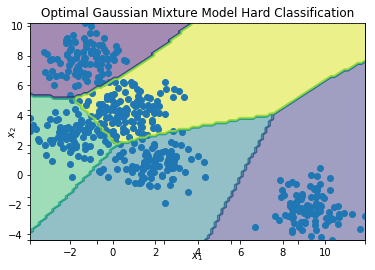

In [26]:
gm = GaussianMixture(n_components=opt_k, n_init=10)
gm.fit(X)
plot_2d_decision_boundary_unsupervised([gm], X, (min(X[:,0]), max(X[:,0])), (min(X[:,1]), max(X[:,1])), 100, 100)
plt.title('Optimal Gaussian Mixture Model Hard Classification')